In [1]:
import importlib
import ORHSProject as proj

import copy
from mantid.simpleapi import *
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

In [59]:
# load data into mantid workspace "neutron data"
inputDataPath = "/SNS/SNAP/shared/temp/ORHSData2.nxs"
neutronData = LoadNexusProcessed(Filename=inputDataPath)
#convert to d-space
ConvertUnits(InputWorkspace="neutronData",
            OutputWorkspace="neutronData",
             Target="dSpacing")

Workspace2D
Title: H2O RT 54 GPa
Histograms: 18432
Bins: 2641
Histogram
X axis: d-Spacing / Angstrom
Y axis: Counts per microAmp.hour
Distribution: False
Instrument: SNAP (2018-May-01 to 2100-Jan-31)Instrument from: /SNS/SNAP/shared/temp/ORHSData2.nxs

Run start: 2023-Jul-10 12:52:24
Run end:  2023-Jul-10 21:10:13

zMax 0.06654199758542591
zMin 0.0004361596855279277
The dimensions of the self.mask array are (96, 192) and its type is bool
The dimensions of the self.image array are (96, 192) and its type is float64
There are 0 masked pixels out of 18432 pixels, or 0.0%.
imbox initialized
The dimensions of the self.mask array are (96, 192) and its type is bool
The dimensions of the self.image array are (96, 192) and its type is float64
There are 13 masked pixels out of 18432 pixels, or 0.07052951388888888%.


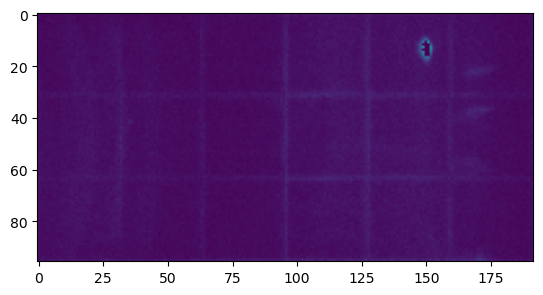

In [60]:
# reload to debug... NOTE: discovered that you also need to rebuild the slice1 object to apply these!
importlib.reload(proj)
imbox = proj.imageToolbox

# create an image toolbox for a single slice and plot
slice1 = imbox(neutronData, 1.22, 1.27)
slice1.image = slice1.maskedImage
# create and apply a thresh mask then plot it
slice1.threshMask(0.5)
slice1.applyMask()
plt.imshow(slice1.maskedImage,vmax=1)

In [61]:
# use new functions to get list of spectra
pixString = slice1.getListOfMaskedPixels()
#test this returns a string of pixel ids
print(pixString)

5809,5811,5839-5844,5871-5875


In [63]:
#final step is to build a mantid Bin Mask Table
#First, create empty table workspace
unit = "dSpacing" 
binTable = CreateEmptyTableWorkspace(OutputWorkspace=f"maskBins_{unit}")
#create headers
binTable.addColumn('double','XMin')
binTable.addColumn('double','XMax')
binTable.addColumn('str','SpectraList')
#add values for slice1. (this could easily be extended to be part of a for loop)
binTable.addRow([slice1.uMin,slice1.uMax,pixString])